# Introduction and Background

We have been exploring how Earth’s orbital parameters vary in time, and how this affects the amount of solar insolation received at certain points on Earth’s surface.  In particular, we have examined how summertime insolation at 65°N latitude affects the growth and melting of large glaciers, such as the one that covered North America during the last ice age.

We will be working with a paleoclimate dataset that is a time series.  A time series is a sequence of data that shows how a variable changes through time.

## Background to the δ$^{18}$O dataset

We will be working with a dataset compiled by Lisiecki and Raymo (2005), which contains information about the volume of ice on land at various times in Earth's history.  These data are calculated from planktonic records collected from multiple sediment cores in the Atlantic, Pacific, and Indian Oceans.  Over the course of their lives, microscopic marine creatures take in H$_2$O from the ocean and incorporate it into their bodies.  When the creatures die, their bodies, which are made primarily of CaCO$_3$, fall to the ocean floor and are gradually buried, over time, by more and more such sediments.

The code you will run for this homework will access and plot the δ$^{18}$O data for you.  If you are interested, the δ$^{18}$O data are available at [https://lorraine-lisiecki.com/LR04stack.txt](https://lorraine-lisiecki.com/LR04stack.txt) and some background on these δ$^{18}$O data is at [https://lorraine-lisiecki.com/simple.html](https://lorraine-lisiecki.com/simple.html).  But you will not need to explore those links in order to do this homework.

## Background to the insolation dataset

We will compare the Lisiecki and Raymo dataset to insolation curves at 65°N latitude on the northern hemisphere summer solstice.  This dataset is calculated from precise equations from astronomy based on the three parameters of earth’s orbit and tilt, described by the mathematician Milankovitch. 

I have already accessed and plotted the insolation data for you.  If you are interested, the insolation data are available at [http://biocycle.atmos.colostate.edu/shiny/Milankovitch](http://biocycle.atmos.colostate.edu/shiny/Milankovitch).

# Analytical Concepts

In this homework, you will explore the relationship between the two above datasets.  You will analyze correlations between the normalized variables as they change in time.

## Rate of Change

The rate of change of a variable is how much it changes between two times.  If the variable increases, the rate of change is positive.  If the variable decreases, the rate of change is negative.  For example, if temperature goes from 10°C on Monday to 12°C on Tuesday, the rate of change would be 2°C/day.  If that temperature then went down to 8°C on Wednesday, the rate of change from Tuesday to Wedesday would be -4°C/day.  The rate of change of a variable can thus be different at different times.  Therefore, you can make a time series of rate of change (temperature change, in °C/day) just like you can make a time series of a variable (temperature, in °C).

Positive rates of change mean the value of a variable is increasing at that time.  Negative rates of change mean the value of a variable is decreasing at that time.


## Correlation

When two or more variables change over time, we can assess the relationship between the variables.  

If the maxima, minima, and times of change occur at roughly the same times for each variable, the variables are correlated.  It is okay if the peaks in one variable are higher than the peaks in another.  This is an example of two **correlated** variables:

<img src="Correlated.png" alt="Drawing" style="width: 800px;"/>

If the maxima, minima, and times of change occur at roughly the same time but one variable reaches its highs when another reaches its lows, and vice versa, the variables are **anticorrelated**:

<img src="Anticorrelated.png" alt="Drawing" style="width: 800px;"/>

If neither relationship is apparent, we describe the variables as **uncorrelated**:

<img src="Uncorrelated.png" alt="Drawing" style="width: 800px;"/>

In this homework, you will analyze whether two time series are correlated, anticorrelated, or uncorrelated.  You can accomplish this by comparing the relationships, by eye, to the example plots above.

# Code to run
All of the code you need to do this assignment is already written.
You will not need to make any modifications to the code shown, and you will not need to write any new code.  All you need to do is run the existing code and think about the outputs.

## How do I run this code?

Put your cursor in each cell (the large gray boxes) and click the "play" button (gray triangle) on the menu bar above.

Or, another way to do it is to put your cursor in the cell and press shift+return.

In [199]:
import numpy as np
import matplotlib.pyplot as plt

dxticks = 25  # xtick interval for all plots (set to a value between 10 and 50)

# Load ice volume data and smooth it
icefileread = 'LR04stack.txt'
a = np.loadtxt(icefileread)
rng = np.arange(426)  # Go back to 425 kyr, including today (0 kyr)
age = a[rng, 0]
delo = a[rng, 1]

# Difference the del18O for rate of change (per mille per kyr) and smooth it over 10 kyr
diffdelo = np.convolve(np.diff(-np.insert(delo, 0, delo[0])), np.ones(10)/10, mode='same')

# Smooth the del18O
smdelo = np.convolve(delo, np.ones(3)/3, mode='same')
smdelo[0] = delo[0]   # Replace errant end with original data
smdelo[-1] = delo[-1]   # Replace errant end with original data

# Load insolation data
insofileread = 'milankovitch.data.txt'
with open(insofileread) as fid:
    for _ in range(9):
        next(fid)
    data = [line.split('\t') for line in fid]
insoage = np.array([-float(row[0]) for row in data])
june = np.array([float(row[4]) for row in data])

# Trim insolation data to the age we're studying
r = np.where((insoage < max(age)) & (insoage > min(age)))
insoage = insoage[r]
june = june[r]

# Interpolate insolation data onto the age timescale we're using
insolation = np.interp(age, insoage, june)
norminsoln = np.interp(age, insoage, (june - np.mean(june)) / np.std(june))

if 'norminsoln' in locals():
    print('Succesfully loaded the data we will analyze!')

Succesfully loaded the data we will analyze!


## What just happened?

You ran the code cell right above this text cell.
After the code ran, it shifted you down to this cell.  If you scroll up, you'll be able to see the code that ran and any outputs that it made.

## What do I do next?
Now that we've loaded the data, let's plot it to see what it looks like.  Scroll down to the next code cell (gray box) and execute it.  Remember there are two ways you can execute: click "play" or press shift+return.

## Time series of δ$^{18}$O data 
First, we'll look at how δ$^{18}$O has varied over time, starting at 420 kyr and coming up to the present. 

**Analyze the graph you'll produce below to answer Questions 6-14 in the homework.**  (Some of those questions require knowledge from the lecture that you won't necessarily find in this graph.)
The graph is a blue line.

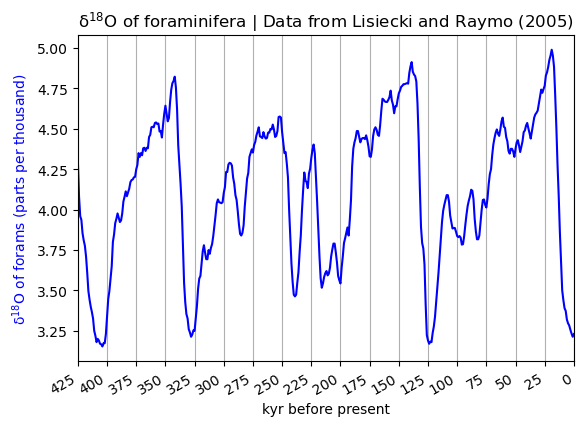

In [279]:
# Plot d18O data
plt.figure(1)
plt.clf()
plt.plot(age, smdelo, '-b')
plt.xlabel('kyr before present')
plt.ylabel('δ$^{18}$O of forams (parts per thousand)', color='blue')
plt.gca().invert_xaxis()
plt.title('δ$^{18}$O of foraminifera | Data from Lisiecki and Raymo (2005)')
plt.xlim([age[-1], age[0]])
plt.gca().set_xticks(np.arange(0, 426, dxticks))
plt.grid(axis='x')
plt.gcf().autofmt_xdate() 
plt.show()

## Summertime insolation at 65°N latitude

Next, you'll plot the history of summertime insolation at 65°N latitude.  
**Analyze the graph you'll produce below to answer Questions 18-23 in the homework.**  (Some of those questions require knowledge from the lecture that you won't necessarily find in this graph.)
The graph is a red dotted line.

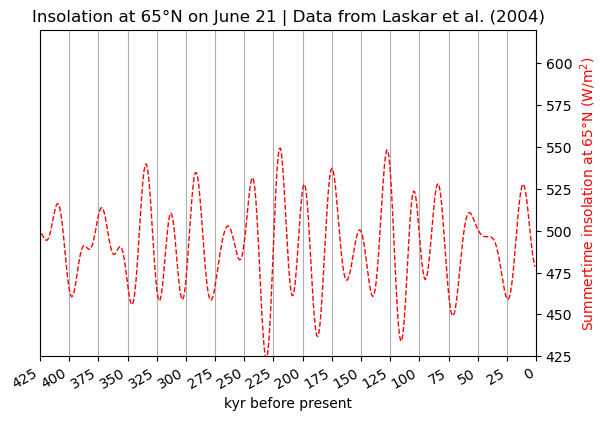

In [277]:
# Plot summertime insolation at 65N
plt.figure(2)
plt.clf()
plt.plot(insoage, june, '--r', linewidth=1)
plt.xlabel('kyr before present')
plt.ylabel('Summertime insolation at 65°N (W/m$^2$)', color='red')
plt.gca().invert_xaxis()
plt.title('Insolation at 65°N on June 21 | Data from Laskar et al. (2004)')
plt.xlim([age[-1], age[0]])
plt.ylim([425, 620])
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.gca().set_xticks(np.arange(0, 426, dxticks))
plt.gcf().autofmt_xdate() 
plt.grid(axis='x')

## Compare δ$^{18}$O of forams to summertime insolation at 65°N

Now you'll put both histories on the same plot, for ease of comparison.  Analyze both histories together with your eyes.

**Analyze the graph you'll produce below to answer Question 26 in the homework.**. The graph shows a blue line and a red dotted line.

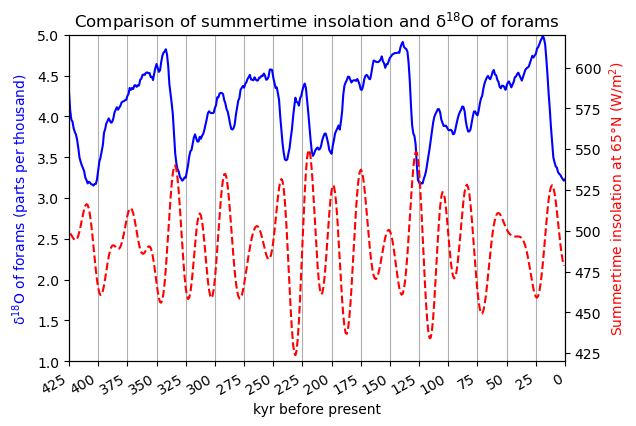

In [241]:
# Compare d18O and insolation on the same plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(age, smdelo, 'b-')
ax2.plot(insoage, june, 'r--')

ax1.set_xlabel('kyr before present')
ax1.set_ylabel('δ$^{18}$O of forams (parts per thousand)', color='blue')
ax2.set_ylabel('Summertime insolation at 65°N (W/m$^2$)', color='red')
ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.set_xlim([age[-1], age[0]])
ax1.set_ylim([1, 5])
ax2.set_xlim([age[-1], age[0]])
ax2.set_ylim([420, 620])
ax1.set_xticks(np.arange(0, 426, dxticks))
ax2.set_xticks(np.arange(0, 426, dxticks))
ax1.xaxis.grid()
plt.gcf().autofmt_xdate() 
plt.title('Comparison of summertime insolation and δ$^{18}$O of forams')
plt.show()

## Rate of change of δ$^{18}$O data versus time

What you found when you analyzed the graph above was unexpected in climate science, and goes against general expectations of the relationship between ice volume and orbital forcing.  It mystified climate scientists for some time, until recently.   For the rest of this homework, we'll work to explain the mystery of why your answer to the previous question seems odd.

Now we'll look at the **rate of change** of the δ$^{18}$O data versus time, which you'll produce in the cell below.
**Analyze the graph you'll produce below to answer Questions 18-23 in the homework.**  The graph is a purple line.

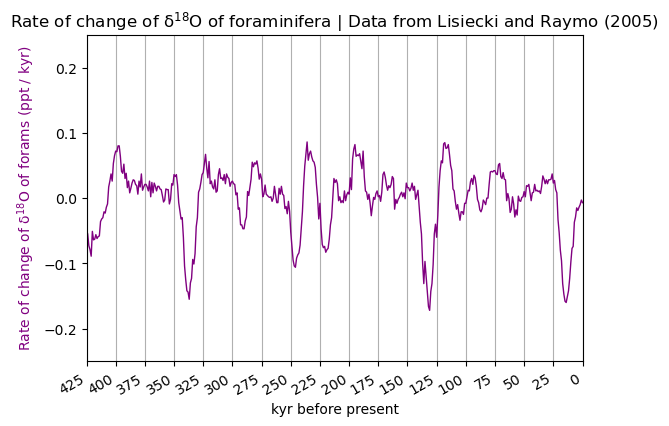

In [281]:
# Plot rate of change of ice volume
plt.figure(4)
plt.clf()
plt.plot(age, diffdelo, color='purple', linewidth=1)
plt.xlabel('kyr before present')
plt.ylabel('Rate of change of δ$^{18}$O of forams (ppt / kyr)', color='purple')
plt.gca().invert_xaxis()
plt.xticks(np.arange(0, 426, 40))
plt.title('Rate of change of δ$^{18}$O of foraminifera | Data from Lisiecki and Raymo (2005)')
plt.xlim([age[-1], age[0]])
plt.ylim([-0.25, 0.25])
plt.gca().set_xticks(np.arange(0, 426, dxticks))
plt.grid(axis='x')
plt.gcf().autofmt_xdate() 
plt.show()

## View the rate of change of δ$^{18}$O data and the insolation data together
 
Finally, let's compare the rate of change of δ$^{18}$O data to the insolation at 65°N data.  The next **two** cells will do that for you.  They both plot the same data, just with differences that might help you view it better.  Choose which one you like better and focus your thinking on that.  They are both the same.

**Analyze one of the graphs you'll produce below to answer Questions 30-31 in the homework.**  The graphs show the purple line and the red dotted line.

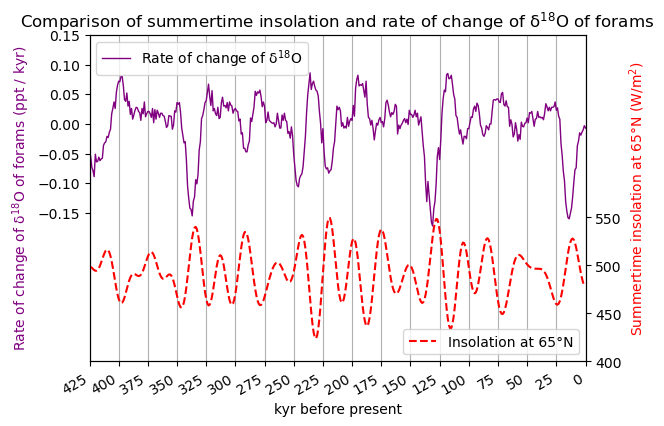

In [275]:
# Plot rate of change of ice volume and insolation on the same plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
gLine1, = ax1.plot(age, diffdelo, color='purple', linewidth=1, label='Rate of change of δ$^{18}$O')
gLine2, = ax2.plot(insoage, june, 'r--', label='Insolation at 65°N')

ax1.set_xlabel('kyr before present')
ax1.set_ylabel('Rate of change of δ$^{18}$O of forams (ppt / kyr)', color='purple')
ax2.set_ylabel('Summertime insolation at 65°N (W/m$^2$)', color='red')
ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.set_ylim([-0.4, 0.15])
ax1.set_yticks(np.arange(-0.15, 0.16, 0.05))
ax2.set_ylim([400, 740])
ax2.set_yticks(np.arange(400, 561, 50))
ax1.set_xlim([age[-1], age[0]])
ax2.set_xlim([age[-1], age[0]])
ax1.set_xticks(np.arange(0, 426, dxticks))
ax2.set_xticks(np.arange(0, 426, dxticks))
ax1.xaxis.grid()
plt.gcf().autofmt_xdate() 
plt.title('Comparison of summertime insolation and rate of change of δ$^{18}$O of forams')
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()

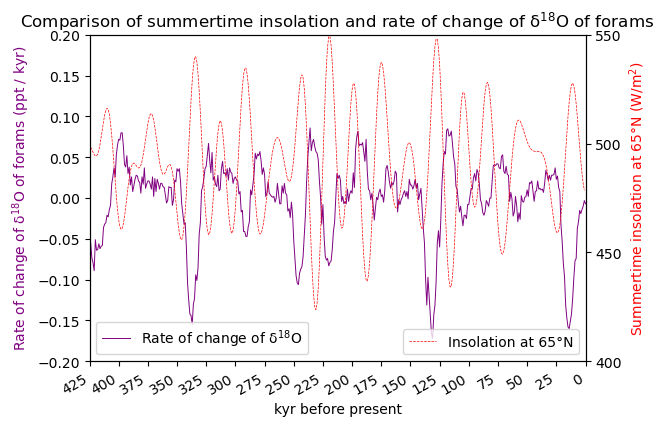

In [273]:
# Plot rate of change of ice volume and insolation on the same plot, and make them overlap for a different view
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
gLine1, = ax1.plot(age, diffdelo, color='purple', linewidth=0.7, label='Rate of change of δ$^{18}$O')
gLine2, = ax2.plot(insoage, june, 'r--', linewidth=0.5, label='Insolation at 65°N')

ax1.set_xlabel('kyr before present')
ax1.set_ylabel('Rate of change of δ$^{18}$O of forams (ppt / kyr)', color='purple')
ax2.set_ylabel('Summertime insolation at 65°N (W/m$^2$)', color='red')
ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.set_ylim([-0.2, 0.2])
ax1.set_yticks(np.arange(-0.2, 0.21, 0.05))
ax2.set_ylim([400, 550])
ax2.set_yticks(np.arange(400, 561, 50))
ax1.set_xlim([max(age), 0])
ax2.set_xlim([max(age), 0])
ax1.set_xticks(np.arange(0, 426, dxticks))
ax2.set_xticks(np.arange(0, 426, dxticks))
#ax1.xaxis.grid()
plt.gcf().autofmt_xdate() 
plt.title('Comparison of summertime insolation and rate of change of δ$^{18}$O of forams')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.show()